In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS

In [8]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 5

In [9]:
# Reduced data in txt files
merged_dat_path = "A:/Documents/Grad_School/Research/IGRINS_Merged/"
fig_path = "A:/Documents/Grad_School/Research/IGRINS_figs/"

In [10]:
merged_files = glob.glob(merged_dat_path+"m*.txt")
merged_files

['A:/Documents/Grad_School/Research/IGRINS_Merged\\mAnon1_M05.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHBC427_K6.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHOPS132_30102016_K_0091_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHOPS294_20163010_K_0081_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHubble4_K8.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mJH108_M15.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mLkCa14_K5.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mLkCa1_M4.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mLkCa4_M2.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mV410-Xray5a_M6.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mV830Tau_K75.txt']

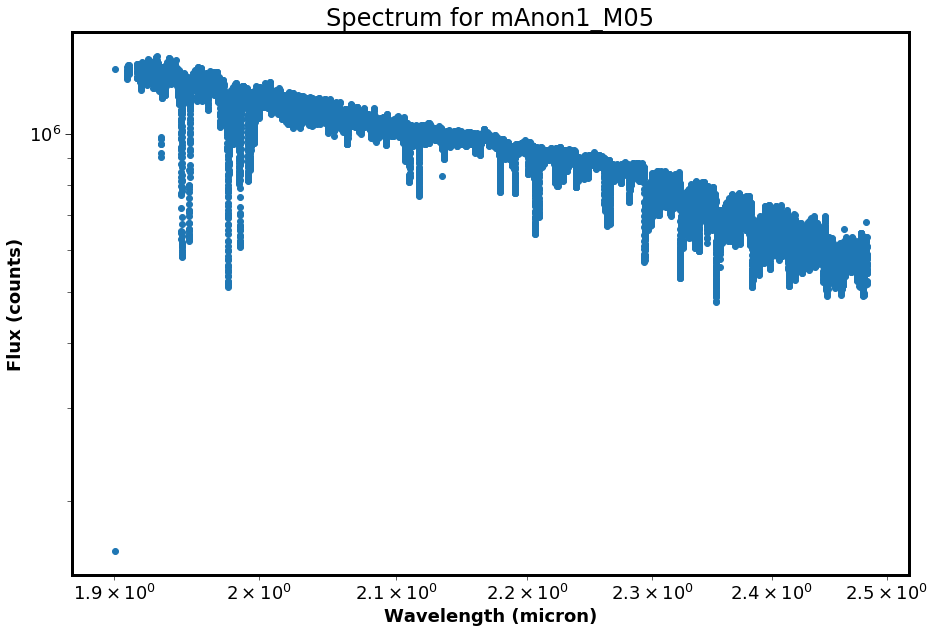

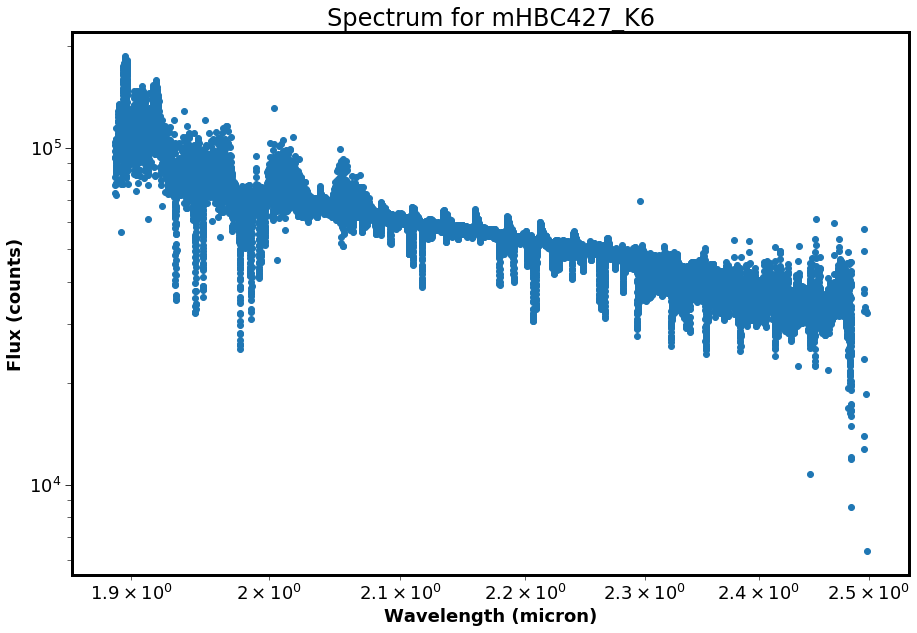

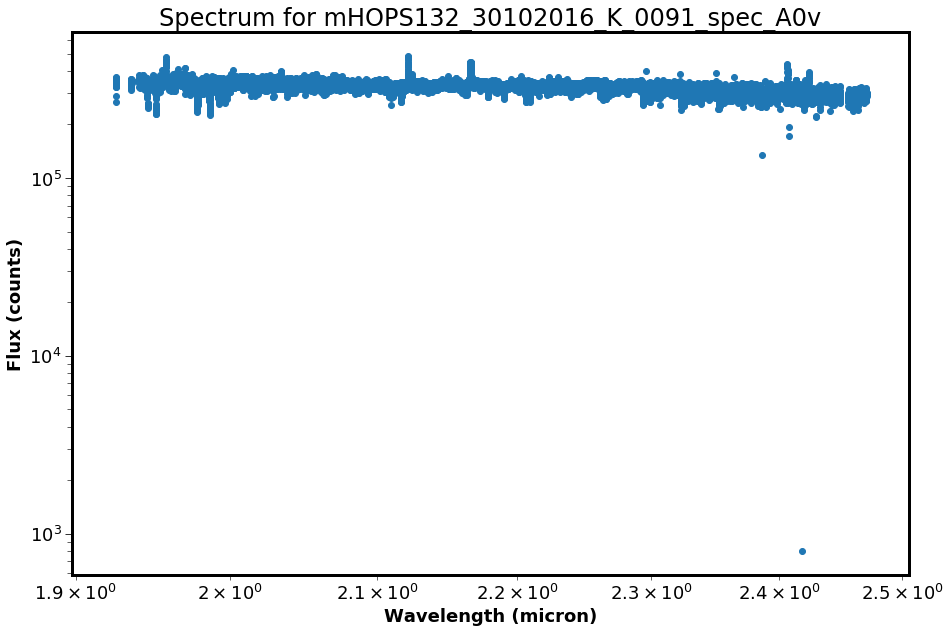

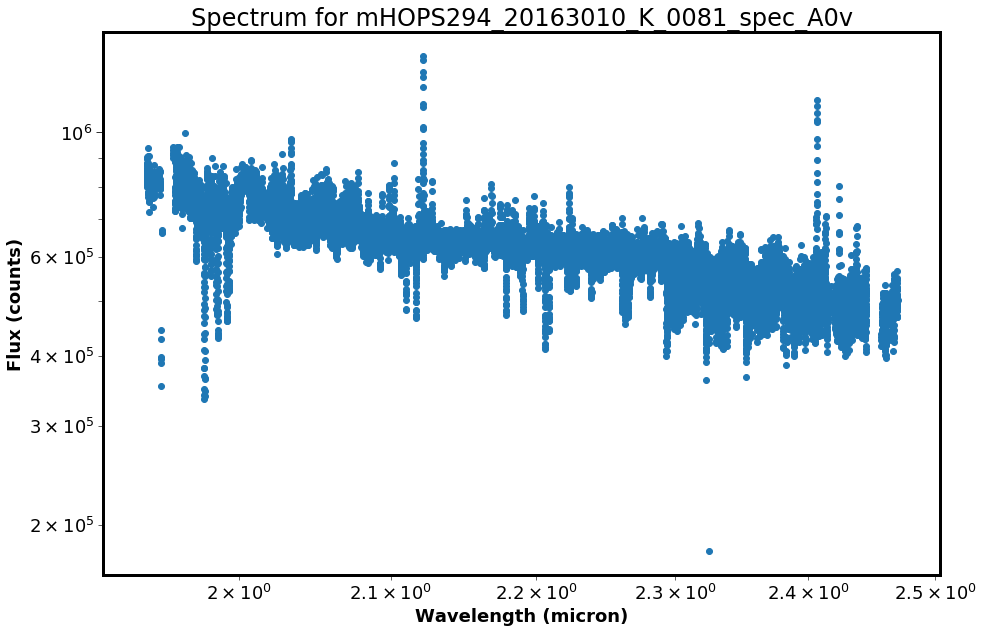

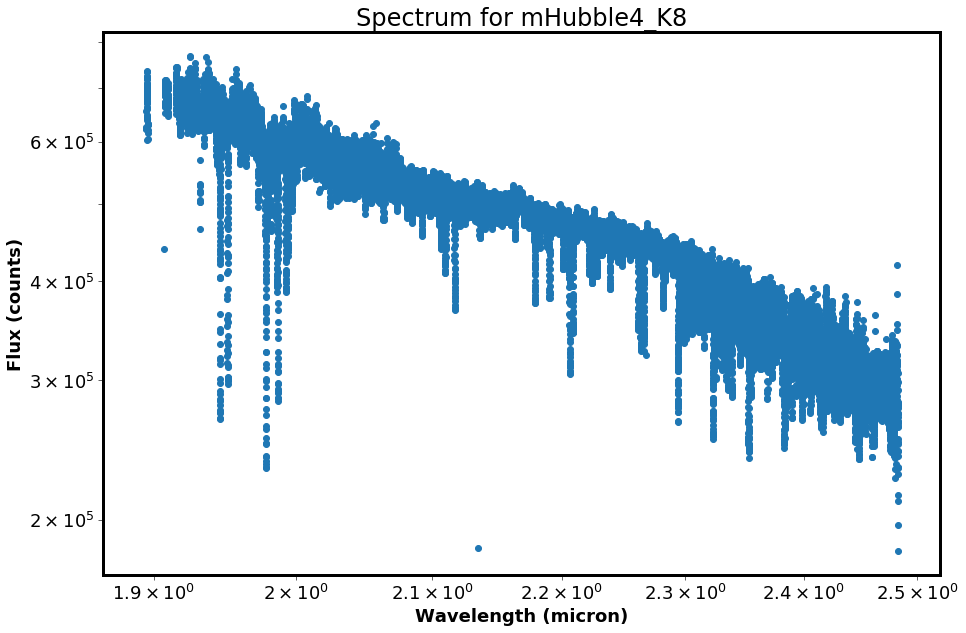

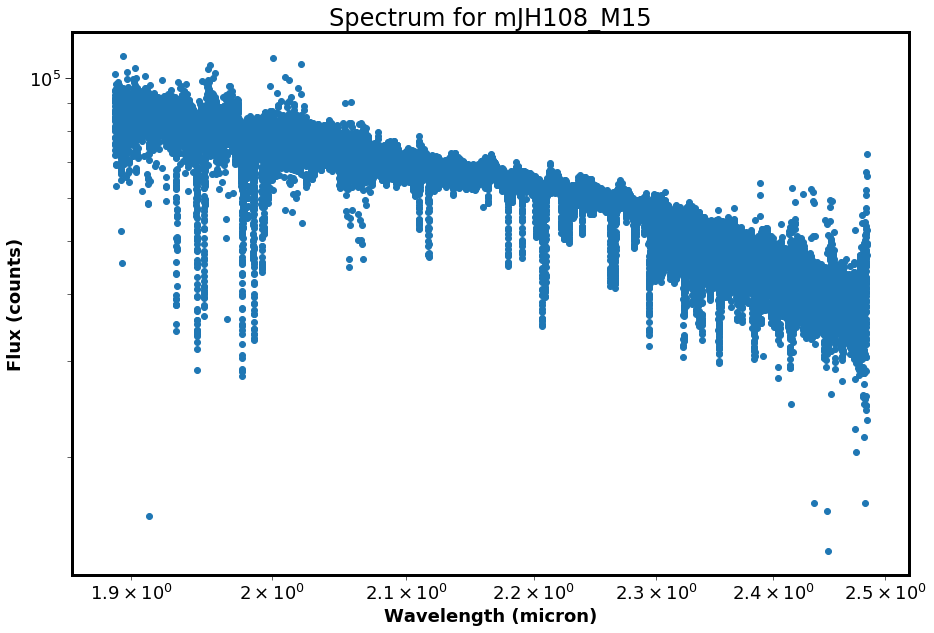

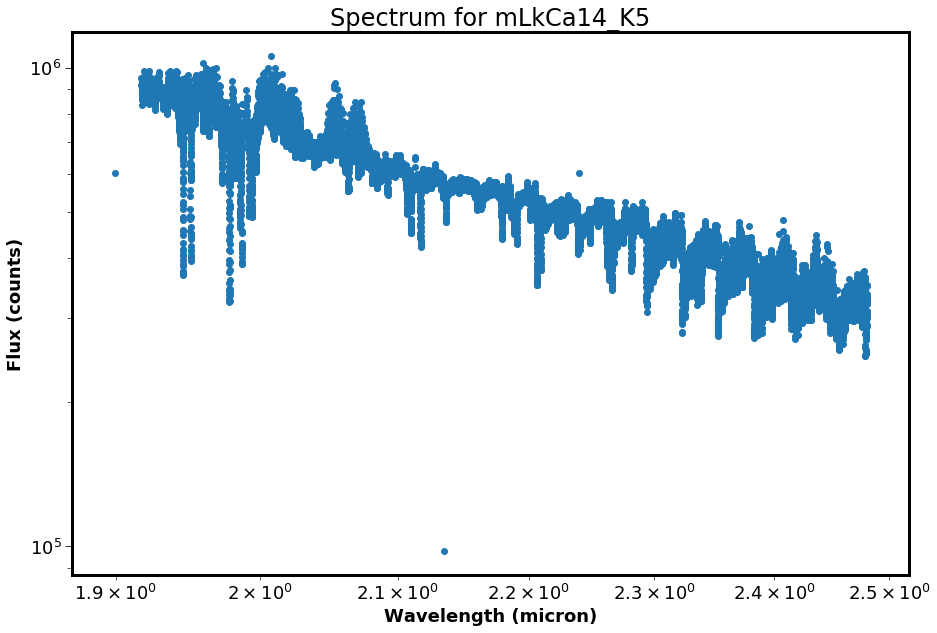

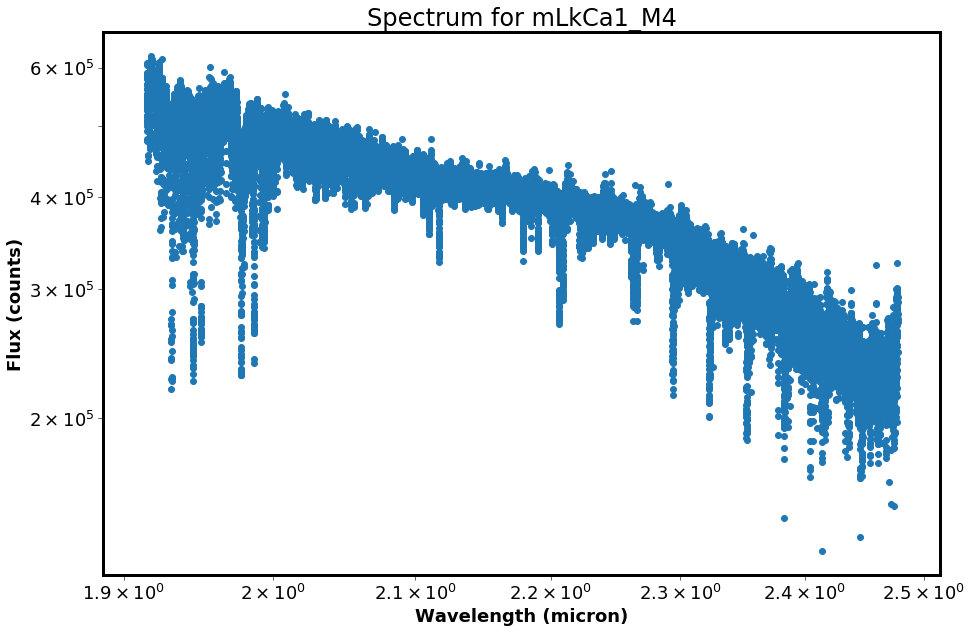

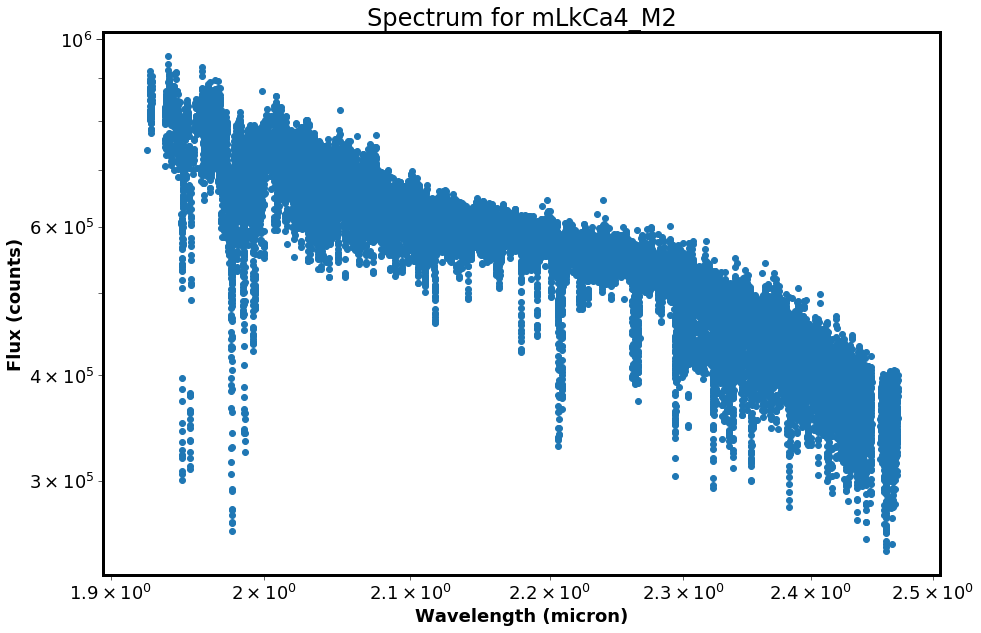

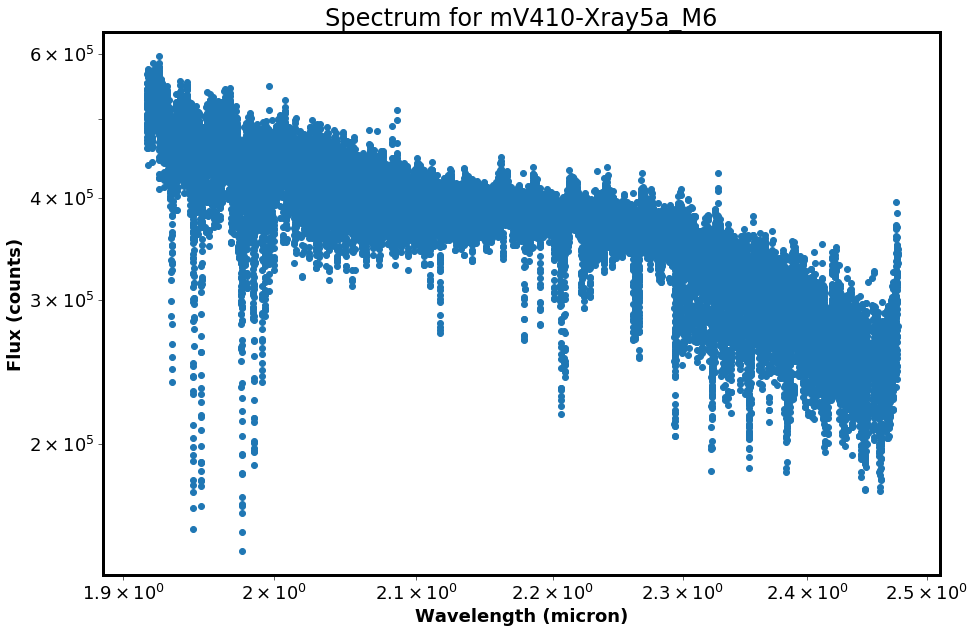

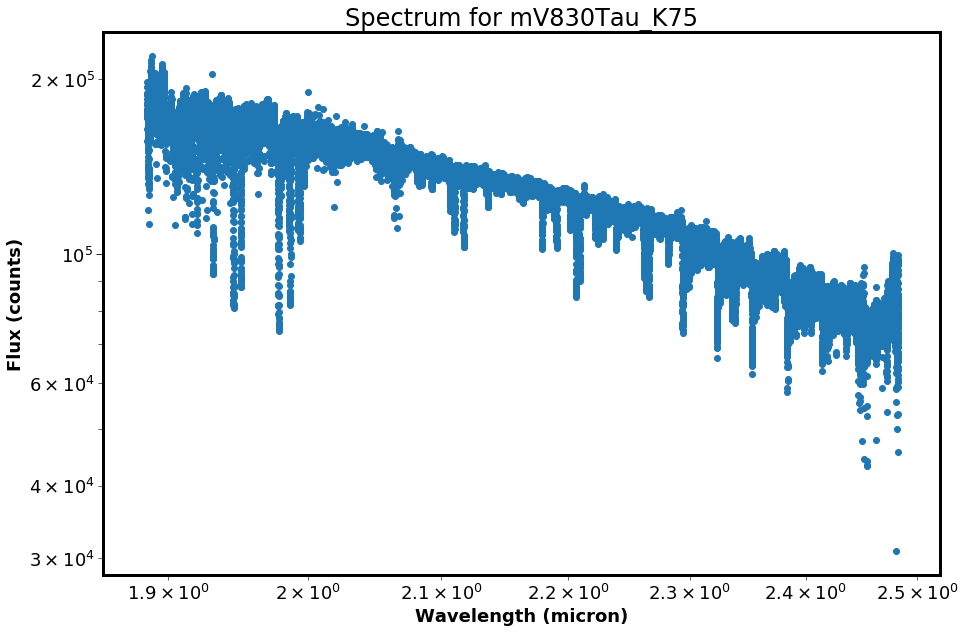

In [30]:
# Iterate over the TXT files
for file in merged_files:
    # Read the data from the TXT file using pandas
    df = pd.read_csv(file, delimiter='\s+', comment='#', header=None)  # Adjust delimiter if necessary
    # For some weird reason column 3 has dtype 'object' so I change it to 'float64'
    df[2] = df[2].astype(float)

    df = df[(df[1] > 0) & (df[2] >= 5) & (df[2] <= 10000)]
    # Extract wavelength and flux columns
    wavelength = df[0]
    flux = df[1]

    # Create a plot of wavelength vs. flux
    fig,ax = plt.subplots(figsize=(15,10))

    ax.scatter(wavelength, flux)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlabel('Wavelength (micron)')
    ax.set_ylabel('Flux (counts)')

    # Extract the filename from the path
    filename = os.path.splitext(os.path.basename(file))[0]
    # Make the title according to the filename
    ax.set_title('Spectrum for {}'.format(filename))
    
    # Save the plot as PNG
    plt.savefig(fig_path+'{}.png'.format(filename))
    # Show the plot
    # plt.show()

In [13]:
# List of Class 3 Standards from MasterObservationList
# Spectral Types range from K1 to M6
# Will try to put to good use later
standards_list = ["Anon1",
"DKTau",
"Haro 6-13",
"HBC 359",
"HBC 427",
"HD 286178",
"HQ Tau",
"Hubble 4",
"JH108",
"JH433",
"LkCa4",
"LkCa14",
"MHO 7",
"MHO 8",
"V410_xray5a",
"V830_tau",
"XEST09-042"
]
# standards_list = standards_list.sort()

In [14]:
# Use pandas to read the .txt file and create a data frame
# Skip first few lines of header, change "-NaN" to NaN in the signal-to-noise columns
hbc427_df = pd.read_csv(hbc427_files[0],skiprows=7, delim_whitespace=True,na_values=['-NaN'])
# Make column names
hbc427_df.columns = ["Spectral Index", "Wavelength", "Flux", "SNR"]
# Define thresholds for SNR and Flux
snr_threshold = 5
flux_threshold = 0
# Do the selection using pandas dataframe magic
hbc427_df = hbc427_df[(hbc427_df["SNR"] > snr_threshold) & (hbc427_df["Flux"] > flux_threshold)]
hbc427_df

NameError: name 'hbc427_files' is not defined

In [ ]:
# Wavelength (microns)
hbc427_wavlen = hbc427_df['Wavelength']
# Flux (counts)
hbc427_flux = hbc427_df['Flux']

In [ ]:
# for wavlen,flux in zip(hbc427_wavlen,hbc427_flux):

fig,ax = plt.subplots(figsize=(20,10))

# Plot wavelength vs flux
# there is definitely a way to do this with a for loop but oh well
ax.scatter(hbc427_wavlen, hbc427_flux,label="hbc427",s=3,c="black")

# ax.set_xlim(1.55,1.56)
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='best')

ax.set_title("hbc427 Spectra", fontsize = 22)
ax.set_xlabel('Wavelength ($\mu m$)',fontsize=16)
ax.set_ylabel('Flux (counts)',fontsize=16)

plt.savefig(fig_path + "hbc427_igrins_spectra" + '.png',facecolor='white')
plt.show()